# Fig setup
Using chou 20210513 unsort data Ch9.<br>
shortcaption: <br>
label: NGD1d_repro_mP

In [1]:
# filename = 'NGD1d_repro_mP'


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.io import loadmat
from scipy.ndimage import gaussian_filter
import os
%matplotlib inline

In [3]:
import import_ipynb
try:
    os.chdir('C:\\Users\\hydro_leo\\Documents\\GitHub\\python-code\\Modules')
except:
    os.chdir('C:\\Users\\llinc\\GitHub\\python-code\\Modules')
from time_shifted_PID import Histo3D2Dict
from time_shifted_PID import PIfunc
from time_shifted_PID import EqualState
from Spike_Generation import Spike_Time_Generater
from Spike_Generation import SG
from Spike_Generation import NL

importing Jupyter notebook from time_shifted_PID.ipynb
importing Jupyter notebook from J_broja_PID.ipynb
importing Jupyter notebook from Spike_Generation.ipynb


In [4]:
plt.rcParams['figure.facecolor'] = 'white'
# plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams["font.size"] = 16
plt.rcParams["mathtext.fontset"] = "cm"

# load files RF

In [5]:
cn=9
BS = loadmat('D:\\GoogleDrive\\retina\\oled_boundary_set', squeeze_me =True)

exp_folder = 'D:\\GoogleDrive\\retina\\Chou\'s data\\20210513\\'
# direction = 'UD'

# SVDnSTK = loadmat(exp_folder+'Analyzed_data\\30Hz_27_RF_15min_re\\unsort\\STK.mat'
#                   , squeeze_me =True)
# STK = SVDnSTK['gauss_RF']

# RFprop  = loadmat(exp_folder+'Analyzed_data\\30Hz_27_RF_15min_re\\unsort\\RF_properties.mat'
#                   , squeeze_me =True)
# RFprop = RFprop['RF_properties']

In [6]:
# rSTK = STK[:,:,:,cn-1].reshape((STK.shape[0],-1))
# U,sigma,VT=np.linalg.svd(rSTK)

# fig, ax = plt.subplots(3,3)
# for i in range(9):
#     ax.flatten()[i].imshow(STK[i,:,:,cn-1])

In [7]:
ExpData = loadmat(exp_folder+'merge\\merge_0224_Checkerboard_30Hz_27_15min_Br50_Q100_re', squeeze_me =True)

In [8]:
checkerboard = ExpData['bin_pos']
fs = 1.5
GFcheckerboard = np.array([gaussian_filter(cb.astype(float), fs) for cb in checkerboard])
GFCcheckerboard = GFcheckerboard - np.mean(GFcheckerboard, axis = 0)
dt = 1/60
rstate, _ = np.histogram(ExpData['reconstruct_spikes'][cn-1], np.arange(len(checkerboard)+1)*dt)
Taxis = np.arange(60)*dt

In [9]:
STK = np.zeros([60,27,27])
for i in range(60): #1s
    for ii in np.arange(0, len(checkerboard)-i):
        STK[i,:,:] += rstate[ii+i]*GFCcheckerboard[ii,:,:]
    STK[i,:,:] /= np.sum(rstate[:len(checkerboard)-i])

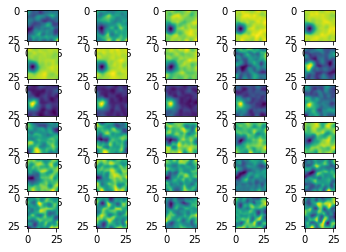

In [10]:
fig, ax = plt.subplots(6,5)
for i in range(30):
    ax.flatten()[i].imshow(STK[i,:,:])

In [11]:
rSTK = STK.reshape((-1,27*27))
U,sigma,VT=np.linalg.svd(rSTK)

# load files MB

In [12]:
file_list = ['D:\\GoogleDrive\\retina\\Chou\'s data\\20200408\\20200408_OU_cutoff=2_sort_unit2',
             'D:\\GoogleDrive\\retina\\Chou\'s data\\20200408\\20200408_OU_cutoff=4_sort_unit2',
             'D:\\GoogleDrive\\retina\\Chou\'s data\\20200408\\20200408_OU_cutoff=7_sort_unit2',
             'D:\\GoogleDrive\\retina\\Chou\'s data\\20200408\\20200408_OU_cutoff=10_sort_unit2',
             'D:\\GoogleDrive\\retina\\Chou\'s data\\20200408\\20200408_OU_original_tau=0p5_sort_unit2']
x_list = []
T_list = []
rstate_list = []
for file in file_list:
    annots = loadmat(file, squeeze_me = True)
    sampling_rate = 20000
    TimeStamps = annots['TimeStamps']
    x = annots['a_data'][0, int(TimeStamps[0]*sampling_rate):int(TimeStamps[1]*sampling_rate)+1]
    x = ndimage.gaussian_filter1d(x, sigma=int(sampling_rate*dt/5), mode='reflect')
    x = x[::int(sampling_rate*dt)]
    x = x.astype(float)
    x = (x -np.mean(x))/np.std(x)
    T = np.arange(len(x)+1)*dt
    x_list.append( x.copy() )
    T_list.append( T.copy() )

# Kernel response

## STA

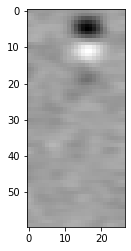

In [13]:
plt.imshow(STK[:,:,4], cmap = 'gray')

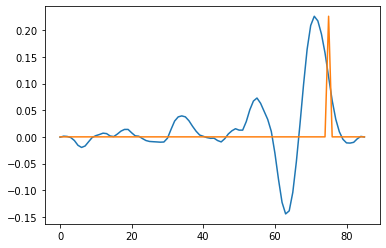

In [33]:
SSK = np.zeros( STK[:,:,4].shape[0]+STK[:,:,4].shape[1]-1 )
for i in np.arange(STK[:,:,4].shape[0]):
    SSK -= np.hstack( (np.zeros(STK[:,:,4].shape[0]-1-i), STK[i,:,4], np.zeros(i) ) )
    
barpos = 16
barpos = barpos+STK[:,:,4].shape[0]-1
bar = np.zeros_like(SSK)
bar[barpos] = max(SSK)

plt.plot(SSK)
plt.plot(bar)

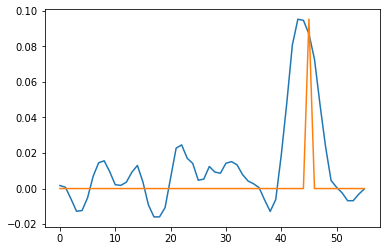

In [38]:
eSTK = STK[::2,:,4]

SSK = np.zeros( eSTK.shape[0]+eSTK.shape[1]-1 )
for i in np.arange(eSTK.shape[0]):
    SSK -= np.hstack( (np.zeros(eSTK.shape[0]-1-i), eSTK[i,:], np.zeros(i) ) )
    
barpos = 16
barpos = barpos+eSTK.shape[0]-1
bar = np.zeros_like(SSK)
bar[barpos] = max(SSK)

plt.plot(SSK)
plt.plot(bar)